In [27]:
# dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# csv path saved to variable-- will need to change the final directory
data = "Resources/Construction_Permits_Issued_since_2010.csv"

In [3]:
# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATA CLEAN UP

In [4]:
# filter to past 5 years
filtered_5y_df = development_data_pd.loc[development_data_pd['CalendarYearIssued'] >= 2013, : ]

In [5]:
# Only final or active status projects...
filtered_5y_status_df = filtered_5y_df.loc[(filtered_5y_df['StatusCurrent'] == 'Final') | (filtered_5y_df['StatusCurrent'] == 'Active'), : ].reset_index(drop=True)

In [6]:
# Only Condominium == Yes
Condo_5y_status_df = filtered_5y_status_df.loc[(filtered_5y_status_df['Condominium'] == 'Yes')]

In [40]:
# Reduce columns
Condo_5y_Columns_df = Condo_5y_status_df[[
    'Description',
    'CalendarYearIssued',
    'Condominium', 
    'OriginalZip',
    'StatusCurrent']]
Condo_5y_Columns_df.head()

# Make zip code an integer
Condo_5y_Columns_df["OriginalZip"] = Condo_5y_Columns_df["OriginalZip"].astype(int)
Condo_5y_Columns_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Description,CalendarYearIssued,Condominium,OriginalZip,StatusCurrent
3285,New 2story Condominium Residence with attached...,2013,Yes,78744,Final
3286,New 2story Condominium Residence with attached...,2013,Yes,78744,Final
3287,NEW 2 STORY SF CONDO WITH ATTACHED GARAGE COVE...,2013,Yes,78744,Final
3288,New 2story Condominium Residence with attached...,2013,Yes,78744,Final
3289,New 2story Condominium Residence with attached...,2013,Yes,78744,Final


In [8]:
# # there are 34 zip codes
# Condo_5y_Columns_df = Condo_5y_Columns_df["OriginalZip"].unique()
# Condo_5y_Columns_df

In [43]:
# Group by zip code and count
Grouped_Condo_5y_Columns_df = Condo_5y_Columns_df.groupby(['OriginalZip']).count()

In [44]:
# Order zip codes
Grouped_Order_Condo_5y_Columns_df = Grouped_Condo_5y_Columns_df.sort_values(["OriginalZip"], ascending=True)
Grouped_Order_Condo_5y_Columns_df.head()

,Description,CalendarYearIssued,Condominium,StatusCurrent
OriginalZip,,,,
78617,1,1,1,1
78652,225,225,225,225
78653,1,1,1,1
78660,244,244,244,244
78702,62,62,62,62


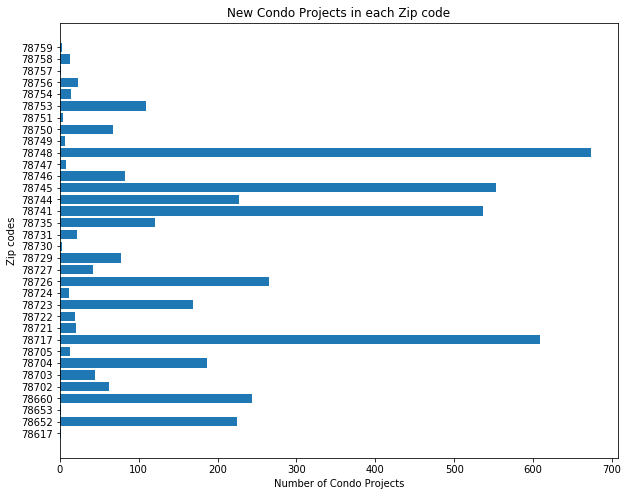

In [77]:
# where condos are being permitted to be built  
# Make a bar graph, with a bar for each zip code...see 1.7 Matplotlib
labels = Grouped_Order_Condo_5y_Columns_df.index.values
y = Grouped_Order_Condo_5y_Columns_df['Description']

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)
ax.barh(np.arange(0, 34, 1), y, align = 'center')  
ax.set_yticks(np.arange(0, 34, 1))
ax.set_yticklabels(labels)

# Give our chart some labels and a tile
plt.title("New Condo Projects in each Zip code")
plt.xlabel("Number of Condo Projects")
plt.ylabel("Zip codes")

plt.savefig("Resources/CondoLocations.png")